# **Project Description: Twitter US Airline Sentiment**
Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

The dataset has the following columns:
 tweet_id

*   airline_sentiment
*   airline_sentiment_confidence
*   List item
*   airline_sentiment
*   airline_sentiment_confidence
*   negativereason
*   negativereason_confidence
*   airline
*   airline_sentiment_gold
*   name
*   negativereason_gold
*   retweet_count
*   text
*   tweet_coord
*   tweet_created
*   tweet_location
*   user_timezone

## 1.Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [98]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [99]:
import numpy as np                               
import matplotlib.pyplot as plt         
import tensorflow as tf
import seaborn as sns
import pandas as pd
%matplotlib inline

In [100]:
df = pd.read_csv('/content/gdrive/MyDrive/PGP-AIML projects/Tweets.csv')
print( 'The dataset has shape ', df.shape)

The dataset has shape  (14640, 15)


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

## 2. Understand of data-columns: (5 Marks)
* Drop all other columns except “text” and “airline_sentiment”. 
* Check the shape of data.
* Print first 5 rows of data.



In [102]:
df1 = df[['text','airline_sentiment']].copy()
df1.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [103]:
print( 'The new dataset has shape ', df1.shape)

The new dataset has shape  (14640, 2)


## 3. Text pre-processing: Data preparation. (20 Marks)
* Html tag and URL removal.
* Remove the numbers.
* Removal of Special Characters and Punctuations.
* Conversion to lowercase.
* Tokenization.
* Stopword removal
* Lemmatize or stemming.
* Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.)
* Print first 5 rows of data after pre-processing.

In [104]:
#!pip install contractions
from bs4 import BeautifulSoup
import contractions
import unicodedata
import re
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [105]:
#Creation of stopwords set removing negative words
stopwords = stopwords.words('english')
customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
stopwords = list(set(stopwords) - set(customlist))    

In [106]:
#-------------Helper functions---------------------------------------------
#Remove html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
#Remove contractions
def replace_contractions(text):
    return contractions.fix(text)
#Remove accented characters
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
#Remove special characters
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

#Change to lowercase from tokenized list
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words
#Remove punctuation from tokenized list
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words
#Remove stopwords from tokenized list
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words
#Lemmatize tokenized list
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

#Apply all functions to tokenized list and join the list
def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

In [107]:
#Removes html, accents and replaces contractions
df1['text'] = df1['text'].apply(lambda x: strip_html(x))
df1['text'] = df1['text'].apply(lambda x: replace_contractions(x))
df1['text'] = df1['text'].apply(lambda x: remove_accented_chars(x))
df1.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials...,positive
2,@VirginAmerica I did not today... Must mean I ...,neutral
3,@VirginAmerica it is really aggressive to blas...,negative
4,@VirginAmerica and it is a really big bad thin...,negative


In [108]:
#Removes any special characters (like @)
df1['text'] = df1['text'].apply(lambda x: remove_special_characters(x, remove_digits = True))
df1.head()

,text,airline_sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus you have added commercials ...,positive
2,VirginAmerica I did not today Must mean I need...,neutral
3,VirginAmerica it is really aggressive to blast...,negative
4,VirginAmerica and it is a really big bad thing...,negative


In [109]:
#Tokenizes column
df1['text'] = df1.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df1.head()

,text,airline_sentiment
0,"[VirginAmerica, What, dhepburn, said]",neutral
1,"[VirginAmerica, plus, you, have, added, commer...",positive
2,"[VirginAmerica, I, did, not, today, Must, mean...",neutral
3,"[VirginAmerica, it, is, really, aggressive, to...",negative
4,"[VirginAmerica, and, it, is, a, really, big, b...",negative


In [110]:
#Removes punctuation, stopwords; changes to lowercase, lemmatizes word and joins list into string
df1['text'] = df1.apply(lambda row: normalize(row['text']), axis=1)
df1.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica not today must mean need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative


## 4. Vectorization: (10 Marks)
* Use CountVectorizer.
* Use TfidfVectorizer.

In [111]:
#Turn label column into numbers
df1["airline_sentiment"].replace({"positive": 1, "neutral": 0, "negative": -1}, inplace=True)
df1.head()

,text,airline_sentiment
0,virginamerica dhepburn say,0
1,virginamerica plus add commercials experience ...,1
2,virginamerica not today must mean need take an...,0
3,virginamerica really aggressive blast obnoxiou...,-1
4,virginamerica really big bad thing,-1


In [112]:
#Checking labels column is in fact numeric
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 228.9+ KB


In [113]:
#Split into training and test set
from sklearn.model_selection import train_test_split
labels = df1['airline_sentiment']
train, test = train_test_split(df1,test_size=0.3, random_state=42)

In [114]:
#Turn into vectors with CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000, lowercase = False)
vectorizer.fit(train['text'])
count_train = vectorizer.transform(train['text']).toarray()
count_test = vectorizer.transform(test['text']).toarray()
count_full = vectorizer.transform(df1['text']).toarray()

In [115]:
# Turn into vectors using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer2 = TfidfVectorizer(max_features=1000)
vectorizer2.fit(train['text'])
Tfidf_train = vectorizer2.transform(train['text']).toarray()
Tfidf_test = vectorizer2.transform(test['text']).toarray()
Tfidf_full = vectorizer2.transform(df1['text']).toarray()

## 5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

You need to use a regular classification model.

 

You need to split the dataset into train and test after pre- processing. train and test can be 70% and 30%. You can use one classification algorithm on each vectorizer separately.

In [116]:
# Random Forest to classify Countvectorizer model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(count_train, train['airline_sentiment'])
print(forest)
print(np.mean(cross_val_score(forest, count_full, labels, cv=10)))
result = forest.predict(count_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7107240437158471


[[2488  241   85]
 [ 357  445   82]
 [ 178  125  391]]


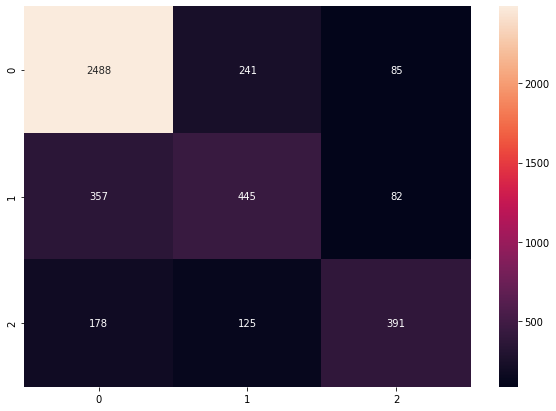

In [117]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test['airline_sentiment'], result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [118]:
# Random Forest to classify Countvectorizer model
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(Tfidf_train, train['airline_sentiment'])
print(forest)
print(np.mean(cross_val_score(forest, Tfidf_full, labels, cv=10)))
result = forest.predict(Tfidf_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.707308743169399


[[2559  182   73]
 [ 427  386   71]
 [ 211  105  378]]


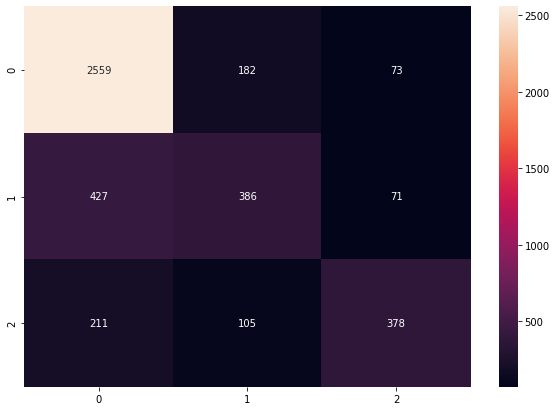

In [119]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(test['airline_sentiment'], result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## 6. Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks)

The preprocessing started by creating a list of stopwords to be removed from the various sentences. After that Html tags were removed since strings came from a web page (Twitter). Contractions were changed (I'm became I am, as an example), accents were removed and so were special characters (like the @ sign), in that order. 

After that preprocessing, sentences were tokenized, so they turn into a list of words. For each list words were completely passed to lowercase, punctuation was removed and so were stopwords from the list. Every word was lemmatized, reducing the vocabulary length. Finally the lemmatized lists were joined back into strings to be analized by the vectorizers.

The train/test split was done before the vectorizer so that we could fit the vectorizer solely on the training set. After that both train and test sets were transformed using the vocabulary from the fitted train set.

A random forest model was applied using each vectorizer independently. Results were pretty much the same for both, obtaining a cross validation score of 0.7.